import libraries

In [1]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from gdal_interfaces import GDALTileInterface, GDALInterface


# Setup Data folder and GDAL Interface parameter with tiling)
- dirpath: path to the directory where datasets subfolder is stored
- elevation_path: path to folder containing elevation tiles
- landcover_path: path to folder containing landcover tiles

In [2]:
dirpath = "/Users/aakash/Desktop/MTP2/exp/"

elevation_path = dirpath + "elevation"
# landcover_path = dirpath + "landcover"
landcover_path = dirpath + "landcover_with_road"
elevation_summary_path = elevation_path + "/elevation_summary.json"
landcover_summary_path = landcover_path + "/landcover_summary.json"

ALWAYS_REBUILD_SUMMARY = True
OPEN_INTERFACES_SIZE = 8

In [3]:
elevation_data_interface = GDALTileInterface(elevation_path, elevation_summary_path, OPEN_INTERFACES_SIZE)
landcover_data_interface = GDALTileInterface(landcover_path, landcover_summary_path, OPEN_INTERFACES_SIZE)

if elevation_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    elevation_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    elevation_data_interface.create_summary_json()
    
if landcover_data_interface.has_summary_json() and not ALWAYS_REBUILD_SUMMARY:
    print('Re-using existing summary JSON')
    landcover_data_interface.read_summary_json()
else:
    print('Creating summary JSON ...')
    landcover_data_interface.create_summary_json()

Creating summary JSON ...
Processing /Users/aakash/Desktop/MTP2/exp/elevation/iit_mandi1_out.tif ... (0.0681772232055664 MB)
	Done! LAT (16448508.450968869,16454403.64838504) | LNG (-263864.28884927556,-254768.07926142836)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/data_us.tif ... (0.1508769989013672 MB)
	Done! LAT (44.296689407195544,44.364736789967594) | LNG (-109.83026167928175,-109.75120993427923)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/elevation_dataset.tif ... (11.907275199890137 MB)
	Done! LAT (38.84777838831176,39.458722613041445) | LNG (-106.72644762535619,-105.95380664948499)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/iit_mandi1.tif ... (0.06269168853759766 MB)
	Done! LAT (31.759662413134603,31.806823965550876) | LNG (76.9625480332187,77.05417619219888)
Processing /Users/aakash/Desktop/MTP2/exp/elevation/elevation_data.tif ... (214.9501428604126 MB)
	Done! LAT (30.392116281951523,33.21561105146759) | LNG (75.0756775530935,79.36010246917314)
Proce

# Bounding box and path dataset filepath
- Add lat1,lon1 and lat2,lon2
- Change resolution
- Add dataset(.tif files) filepath (for GDAL interface (without tiling))

In [4]:
# USA random mountain
# lon1, lat1 = -109.83007049344715, 44.36470033197011
# lon2, lat2 = -109.7513685303535, 44.29673563882564

# India
# lon1, lat1 = 77.28112208857522,32.135432817449384
# lon2, lat2 = 77.62169826045022,31.94918029751246

# Colorado [Whole region]
# lon1, lat1 = -106.72643114729188,38.84785651131714
# lon2, lat2 = -105.95392348402243,39.458493653253676

# Colorado (peak to peak example)
# lat1, lon1 = 38.94374018363843, -106.5759101561709
# lat2, lon2 = 39.04527792014898, -106.38578062842298

# manali (hanuman tibba - manali)
lat1, lon1 = 32.372571, 76.983637
lat2, lon2 = 32.189737, 77.315875

# # mandi (road network)
# lat1, lon1 = 31.515, 76.808
# lat2, lon2 = 31.978, 77.472

#
# lat1, lon1 = 32.474, 77.110
# lat2, lon2 = 32.306, 77.745

# palan - sosan 
# lat1, lon1 = 32.537047, 76.554121
# lat2, lon2 = 31.924304, 77.535921

# # arnehar - mandi
# lat1, lon1 = 31.778518, 77.013229
# lat2, lon2 = 31.764576, 77.042884

# keylong - tosh
# lat1, lon1 = 32.553983959102354, 76.9572465564983
# lat2, lon2 = 32.02887381373745, 77.50664575756166

# menthosa - sosan
# lat1, lon1 = 32.90954351269039, 76.68373432249861
# lat2, lon2 = 31.863216801377973, 77.67972370282335

lon1, lat1 = 76.95459234317525,31.801679137058297
lon2, lat2 = 77.02411520084127,31.764177519360725

resolution = 30

# Generate Matrix
- Using GDAL tile interface

In [5]:
elevation_map, landcover_map = getGrayLevelMatrixFromDataSet(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

start:  31.801679137058297 76.95459234317525
end:  31.764177519360725 77.02411520084127
shape:  140 220


- Using multithreading

In [23]:
# elevation_map, landcover_map = getGreyLevelMultiThread(lon1, lat1, lon2, lat2, elevation_data_interface, landcover_data_interface, resolution)

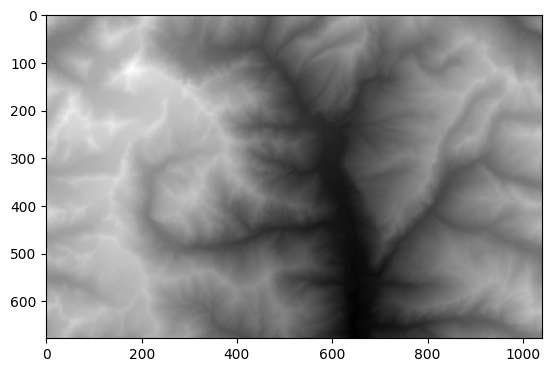

In [24]:
plt.imshow(elevation_map,cmap='gray')
plt.show()

In [25]:
print("Elevation Map Info")
print(f"Gray Map Shape: {elevation_map.shape}")
print(f"Min: {elevation_map.min()}")
print(f"Max: {elevation_map.max()}")

Elevation Map Info
Gray Map Shape: (678, 1041)
Min: 1667
Max: 5877


<Axes: >

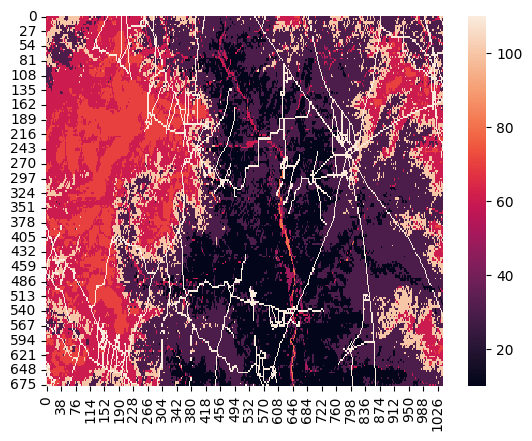

In [26]:
import seaborn as sns
sns.heatmap(landcover_map)

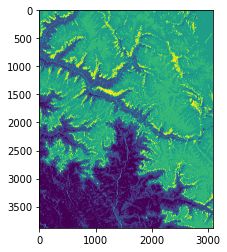

In [10]:
plt.imshow(landcover_map)
plt.show()

Source and Destination

In [9]:
n,m = elevation_map.shape

# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

# src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226

# hanuman tibba
# src_lat, src_lon = 32.216951, 77.231191
# des_lat, des_lon = 32.341876, 77.040854

src_lat, src_lon = 31.775167, 77.017773
des_lat, des_lon = 31.772527, 77.029848

# palan
# src_lat, src_lon = 32.369789, 76.766289
# des_lat, des_lon = 32.076790, 77.312516

# menthosa - sosan
src_lat, src_lon = 32.80644936709285, 76.82298402202355
des_lat, des_lon = 32.29517226314917, 77.4885503853536

src_latIdx,src_lonIdx = findIndex(src_lat,src_lon, lat1,lon1, lat2,lon2, resolution)
des_latIdx,des_lonIdx = findIndex(des_lat,des_lon, lat1,lon1, lat2,lon2, resolution)

Dijkstra

In [39]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from dijkstra import dijkstraFromSrc, showPath

In [40]:
alpha = 0
h_weight = 0.1
slope = 40
# distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, src_latIdx, src_lonIdx, resolution)
distFromSrc, parentMat  = dijkstraFromSrc(elevation_map, landcover_map, src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)

In [1]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

NameError: name 'plt' is not defined

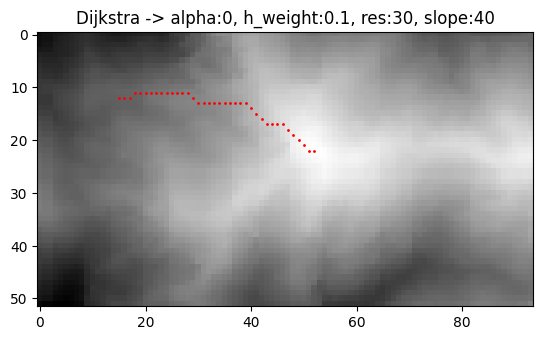

In [42]:
showPath(elevation_map, parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx,alpha,h_weight,resolution,slope)